# <center>  Основы NLP 
<center>
<img src="https://miro.medium.com/max/2672/1*_Nb5AADlqVQJDa0YyNFKGA.jpeg">
     
## <center> Часть 1. Подготовка текстовых данных

### <center> 1. Очистка данных (Data Refinement)
Даны 3 предложения разного языка и содержания. Попробуем очистить их от зашумленности (знаков пунктуации, stop-words)

In [ ]:
data = ["Вчера была достаточно приятная погода. Сходил погулять... и ни капли не пожалел! ",
        " Jack peacefully drown in his armchair; Robin made no sign of disgust. ",
        "Als ich in Minsk war, war ich erstaunt, wie langweilig die Leute hier waren!!!"]

Разнообразную работу с паттернами текстовых данных предлагает библиотека <i>**re**</i> (регулярные выражения).<br>
Еще более обширные возможности для работы с текстом содержит библиотека <i>**nltk**</i>, с которой мы немного ознакомимся в течение урока.


**В первую очередь просмотрим, какие стоп-слова содержит библиотека nltk для 3 языков (немецкий, английский, русский)**

In [ ]:
from nltk.corpus import stopwords
import re
for i in ['russian','english','german']:
    print('\nLanguage:',i, '\nStop-words:', *stopwords.words(i) )

**Создадим функцию preprocess_data, с помощью которой все посланные на вход предложения очищаются от стоп-слов и знаков препинания**

In [ ]:
def preprocess_data(data):# подаём на вход функции список со всеми предложениями
    
    preprocessed_data = []
    for sent in data:
        sent = re.sub('[^a-zA-Zа-яА-Я]+', ' ', sent).strip().lower() # удаление пунктуации, пробелов + lower case 
        sent = [x for x in sent.split() if x not in [*stopwords.words('english'), 
                                                     *stopwords.words('russian'),
                                                     *stopwords.words('german')]]
        sent = ' '.join(sent)
        preprocessed_data += [sent] # пополнение списка очищенным предложением
        
    return preprocessed_data # возвращаем очищенные предложения

#### Смотрим, что получилось и радуемся чистоте!

In [ ]:
preprocessed_data = preprocess_data(data)
for i in range(len(data)):
    print("\nБыло: ", data[i], "\nСтало:", preprocessed_data[i])

### <center> 2. Токенизация

**Токенизация** - разбиение массива текстовых данных на токены (абзацы, предложения, слова, символы).<br>
Самая примитвная токенизация - метод <i>split</i> в Python. Там вы можете сплитить текст по <i>пробелам, /n, /t и другим символам.</i><br> 
Библиотека <i>**NLTK**</i> предлагает свои модули для токенизации.

Пусть нам дано предложение <i>“John's big idea isn't all that bad.”</i><br> 
Нам нужно получить токены, составляющие его. Сравните стандартный метод <i>split</i> c <i>word_tokenize</i>:

In [ ]:
from nltk import word_tokenize

sent1 = "John's a big idea on his mind."
sent2 = "John's big idea isn't all that bad."

print(sent1, "\n\nNTLK токенизатор:", word_tokenize(sent1))
print("Стандартный сплиттер:", sent1.split(' '))
print('_'*100, '\n')
print(sent2, "\n\nNTLK токенизатор:", word_tokenize(sent2))
print("Стандартный сплиттер:", sent2.split(' '))

<br><br>Также в <i>**NLTK**</i> встроен PoS-tagger, позволяющий нам определять части речи.<br>
Токенизируем текст сначала по предложениям, потом по словам, а затем выявим для каждого слова его часть речи (PoS tag).
Заметьте, что делает pos tagger, если не знает части речи:

In [ ]:
from nltk import word_tokenize, sent_tokenize, pos_tag

text = "Good muffins cost $ 3.88 in New-York. Please buy me two of them. Thanks."
sentences=sent_tokenize(text)

for sent in sentences:
    s = pos_tag(word_tokenize(sent))
    print(*[f'{i[0]} = {i[1]}' for i in s],sep='\n')

Расшифровка тэгов для тех, кто ничего  не понял:
<img src="https://d2h0cx97tjks2p.cloudfront.net/blogs/wp-content/uploads/sites/2/2018/08/speech-tagging.png">

### <center> 3. Лемматизация и стемминг

**Лемматизация** и **стемминг** - методы нормализации текста.<br> Лемматизация отвечает за приведение слова к его начальной форме, стемминг - за приведение слова к его квазиоснове.

Начнём с лемматизации. <br>
Как ни странно, и здесь <i>**NLTK**</i> предлагает свой лемматизатор (однако только для английского).
<font color='blue'><br>Обязательно добавлять в pos части речи, иначе лемматизатор не заработает!!!</font>

In [ ]:
from nltk.stem import WordNetLemmatizer
wnl = WordNetLemmatizer()

print("NOUNS:")
print('beauties -->', wnl.lemmatize('beauties', pos="n"))
print('antennae -->',wnl.lemmatize('antennae', pos="n"))
print('cacti -->',wnl.lemmatize('cacti', pos="n"))
print('feet -->',wnl.lemmatize('feet', pos="n"))

**А теперь поиграем в одну игру**<br>
Вспомните то, что всегда хотели лемматизировать и запустите блок.<br>Введите желаемое слово и его тэг (a, v or n) и лемматизатор ответит на все ваши вопросы<br><i>Когда надоест, введите "хватит".</i>

In [ ]:
word = ''
while word!="хватит":
    word = input("Слово: ")
    if word!="хватит":
        tag = input("PoS: ")
        print('Лемма -->', wnl.lemmatize(word,pos=tag),'\n')
        
    else:
        break

Для русской лемматизации существует библиотека ***pymorphy2***:

In [ ]:
### 3) Term Frequency - Document Frequency
import pymorphy2
from nltk import word_tokenize, sent_tokenize, pos_tag
morph = pymorphy2.MorphAnalyzer()
data = ['Вчера бы### 3) Term Frequency - Document Frequency
ла достаточно приятная погода. Сходил погулять... ни капли не пожалел!']

for sent in data:
    print(sent.strip()+'\n')
    for sentence in sent_tokenize(sent.rstrip()):
        print("Предложение:", sentence+'\n')
        
        for word in word_tokenize(sentence):
            print("\t"+word)
            output = morph.parse(word)
            for info in output:
                lema = info.normal_form
                tag = str(info.tag)
                #lema_score = info.score
                print("\t\t"+lema+"\t"+tag+'\n')

**Стемминг** же можно осуществить с помощью модуля *SnowballStemmer* в **nltk**:

In [ ]:
from nltk import word_tokenize, sent_tokenize, SnowballStemmer
stemmer = SnowballStemmer("english")

print('beauties -->', stemmer.stem('beauties'))
print('beautiful -->', stemmer.stem('beautiful'))
print('going -->', stemmer.stem('going'))
print('showing -->', stemmer.stem('showing'))
print('friendships -->',stemmer.stem('friendship'))
print('suffered -->',stemmer.stem('suffered'))

In [ ]:
from nltk import word_tokenize, sent_tokenize, SnowballStemmer
stemmer = SnowballStemmer("russian")

print('официанты -->', stemmer.stem('официанты'))
print('делая -->', stemmer.stem('делая'))
print('отвратительный -->', stemmer.stem('отвратительный'))
print('люблю -->', stemmer.stem('люблю'))
print('земля -->',stemmer.stem('земля'))
print('ночь -->',stemmer.stem('ночь'))

### <center> 4. Векторизация

**Векторизация** - преобразование текстовых данных в вектора, которые впоследствии используются для работы с машинным обучением.<br>
Векторизация, пожалуй, является одним из важнейших этапов в предобработке текстовых данных. 
Качество работы <i>моделей машинного обучения</i> <u>напрямую</u> зависит от качества векторного представления данных (в нашем случае, текста)

<font color='black'>**Идея контекстуальной схожести**</font> - слова, встречающиеся в одинаковом контексте, имеют одинаковое значение

**2 типа векторов**:
<ul>
    <li> Bag of Words (не основаны на идее контекстуальной схожести)</li>
    <li> Word Embeddings (основаны на идее контекстуальной схожести) </li>
</ul>



### <center>**Bag of Words**</center>

Общеприняты 3 типа построения BoW: *OHE (binary), Count Encoding (frequency), TF-IDF <br>*
И то, и другое, и третье в одну строку нам позволяет сделать библиотека **sklearn** и соответствующие методы

Для начала построим функцию **plot_vectors**, которая нам визуально будет отображать наши вектора:<br>

In [161]:
def plot_vectors(X):
 
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X.todense()).transpose()
    origin = [0], [0] # origin point
    plt.xlabel('X')
    plt.ylabel('y')
    plt.quiver(*origin, reduced[0], reduced[1], color=['blue', 'black','red'], scale=2);

In [ ]:
Есть корпус текстов, нам нужно его векторизировать. Поехали!

### 1) One hot encoding (Binary)


In [156]:
from sklearn.feature_extraction.text import CountVectorizer

corpus = ['Майк любит играть в футбол. Майк и футбол = <3.',
          'Майк и футбол = <3!',
          'А Екатерина любит после работы поспать. Ну и повекторизировать тексты.']

vectorizer = CountVectorizer(binary=True) # указываем параметр "binary" = True 
X = vectorizer.fit_transform(corpus)

print("Признаки нашего корпуса (уникальные слова):")
print(*vectorizer.get_feature_names(), sep=' | ')

Признаки нашего корпуса (уникальные слова):
екатерина | играть | любит | майк | ну | повекторизировать | после | поспать | работы | тексты | футбол


Обратите внимание на то, что CountVectorizer всё самостоятельно протокенизировал, убрал знаки препинания и понизил шрифт. В настройках параметров можно убрать эту "самостоятельность".<br><br>
**А теперь посмотрим, как наши предложения векторизировались (заметьте, что единицы в векторах точно соответствуют порядку фичей сверху):**

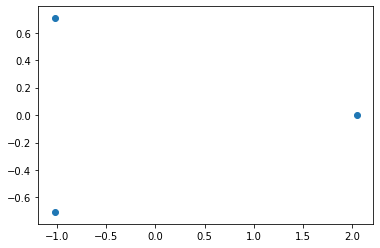

In [157]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

# We need a 2 x 944 array, not 944 by 2 (all X coordinates in one list)
t = reduced.transpose()

plt.scatter(t[0], t[1])
plt.show()

In [ ]:
print(*[f'{i} --> {vector}' for i,vector in zip(corpus, X.toarray())], sep='\n')

### 2) Frequency Encoding


In [113]:
vectorizer_count = CountVectorizer() # указываем параметр "binary" = False
X = vectorizer_count.fit_transform(corpus)
print(*[f'{i} --> {vector}' for i,vector in zip(corpus, X.toarray())], sep='\n')

Майк любит играть в футбол. Майк и футбол = <3. --> [0 1 1 2 0 0 0 0 0 0 2]
А Екатерина любит после работы поспать. Ну и повекторизировать тексты. --> [1 0 1 0 1 1 1 1 1 1 0]


### 3) Term Frequency - Document Frequency


In [141]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer_tfidf = TfidfVectorizer()
X = vectorizer_tfidf.fit_transform(corpus)
print(*[f'{i} --> \n{vector}' for i,vector in zip(corpus, X.toarray())], sep='\n')

Майк любит играть в футбол. Майк и футбол = <3. --> 
[0.         0.40142857 0.30529678 0.61059355 0.         0.
 0.         0.         0.         0.         0.61059355]
Майк и футбол = <3. --> 
[0.         0.         0.         0.70710678 0.         0.
 0.         0.         0.         0.         0.70710678]
А Екатерина любит после работы поспать. Ну и повекторизировать тексты. --> 
[0.36325471 0.         0.27626457 0.         0.36325471 0.36325471
 0.36325471 0.36325471 0.36325471 0.36325471 0.        ]


[[-0.41819531 -0.48783783  0.90603314]
 [ 0.26554026 -0.25227297 -0.01326729]]


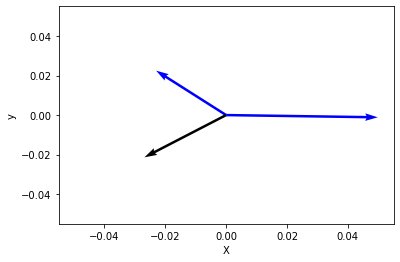

In [153]:
def plot_vectors(data)
    
    pca = PCA(n_components=2)
    reduced = pca.fit_transform(X.todense()).transpose()
    origin = [0], [0] # origin point
    plt.xlabel('X')
    plt.ylabel('y')
    plt.quiver(*origin, reduced[0], reduced[1], color=['blue', 'black','red'], scale=2);

##### Обратите внимание, что 4-ая позиция в векторе, отвечающая за слово "Майк" имеет самое высокое значение. Почему? 
